# Dimensionality reduction 1

Practice applying and using **dimensionality reduction** for analysing datasets with Principal Component Analysis (`PCA` & `Kernel PCA`), but continue with the more powerful t-SNE and UMAP algorithms.

---
### Data

The dataset is a photometric catalogue of galaxies. These galaxies were found in the 2-square degree field on the sky called COSMOS by space- and ground-based telescopes.

The radiation flux (energy per second) of each galaxy is measured in 8 bands (i.e. wavelengths of light) that span the spectrum from <span style="color:blue;">blue</span> to <span style="color:rgb(192,4,1,1);">infrared</span>: `u, r, z++, yHSC, H, Ks, SPLASH1, SPLASH2`. The fluxes are not corrected for any effects, such as distance to a galaxy, therefore there is a systematic effect in their measurements (called redshift).

So, in addition to its photometry each galaxy has its observed bias and physical properties:
* `redshift`$^1$ - systematic bias in flux measurements.
* `log_mass` - stellar mass in units of $log_{10}$ (inferred from a combination of fluxes and redshifts).
* `log_sfr` - rate of star formation in units of $log_{10}$ (inferred from a combination of fluxes and redshifts).
* `is_star_forming` - classification, based on galaxy colours (inferred from a combinations of fluxes and redshifts).

<span style="font-size:0.9em;"> $^1$ - redshift is the reddening of light that is proportianal to the velocity of an object receding away. On the sky, object velocities are proportional to their distances from us ([find out more](https://www.anisotropela.dk/encyclo/redshift.html)). </span>

---
* Authors:  Vadim Rusakov, Charles Steinhardt, Troels Petersen
* Email:  vadim.rusakov@nbi.ku.dk, petersen@nbi.dk
* Date:   5th of May 2025

In [ ]:
!conda install -c conda-forge umap-learn

Channels:
 - conda-forge
 - defaults
Platform: osx-arm64
Solving environment: done


==> WARNING: A newer version of conda exists. <==
    current version: 25.1.1
    latest version: 25.3.1

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import umap
from matplotlib.colors import LogNorm
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE

Load in the data:

In [7]:
file = "datasets/cosmos2015.csv"
df = pd.read_csv(file, index_col=False)
df

,redshift,log_sfr,log_mass,is_star_forming,u_flux,r_flux,zpp_flux,yhsc_flux,h_flux,ks_flux,splash1_flux,splash2_flux
0,0.173,-0.185166,10.08220,0,9.079690,107.628000,249.30300,280.15900,426.95200,474.21400,441.68500,343.36600
1,0.116,-0.470215,9.02189,0,8.570400,52.884300,105.81000,117.26600,156.32100,146.49400,167.30100,115.66600
2,0.232,0.228303,10.24250,0,6.588400,89.080900,215.42300,247.41400,387.10000,455.83800,437.71700,362.45100
3,0.208,-1.797320,7.98980,1,0.241170,0.975295,1.47919,1.49645,2.84649,3.43519,6.33809,7.14621
4,0.489,-0.430443,10.65050,0,0.382350,10.460500,34.27770,39.15310,70.91750,87.37050,74.89360,57.32130
...,...,...,...,...,...,...,...,...,...,...,...,...
20350,0.711,1.044900,10.11260,1,2.480290,6.360220,15.51100,17.26700,27.15210,33.56980,41.62840,30.65300
20351,0.361,0.641278,9.75474,0,1.962290,18.296000,46.32240,52.10730,91.22180,116.03600,80.30160,79.08950
20352,0.489,0.104801,10.76330,0,0.641645,13.892800,46.05850,52.97450,101.43100,129.24300,116.25500,93.80680
20353,0.460,-1.237760,10.65170,0,0.779877,16.147200,40.55250,45.68750,74.65830,93.49390,59.48300,47.03440


Select a random sub-sample of the dataset. `PCA` does computations linearly, therefore it's quick and you can choose the whole dataset if you wish.

In [8]:
# select a random sub-sample of the dataset
n = 10000
idxs = np.arange(df.shape[0])
idxs_rand = np.random.choice(idxs, size=n)
df_cut = df.iloc[idxs_rand] # dataframe
X = df.iloc[idxs_rand].values # array

flux_cols = list(df.columns[4:]) # flux column names
flux_idxs = np.argwhere(np.isin(df.columns, flux_cols)).flatten() # flux column indices

## Principal Component Analysis (PCA)

Now take the galaxy data (fluxes) and find out whether you can reduce it to a couple of meaningful principal components using `PCA`. By meaningful, we are interested in the method that is capable of separating galaxies into `star forming` or `dead`.

Use the following parameters: `n_components=2`. The user interface of the PCA in sklearn is the same as for all other similar classes (see PCA [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)).

You can access training data (only fluxes columns) as `X[:, flux_idxs]`.

In [5]:
pca = PCA() # get a pca object of class PCA()
y_pcs = pca.fit_transform() # train pca object on fluxes (raw observed data)

TypeError: PCA.fit_transform() missing 1 required positional argument: 'X'

In [ ]:
# create a figure
fig, ax = plt.subplots(1, figsize=(5, 5), dpi=100)
ax.set_xlim(np.percentile(y_pcs[:,0], 99), np.percentile(y_pcs[:,0], 1))
ax.set_ylim(np.percentile(y_pcs[:,1], 99), np.percentile(y_pcs[:,1], 1))
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
is_sf = np.isin(df_cut.loc[:, 'is_star_forming'], 1) # is a galaxy forming stars, i.e. alive?

# scatter plot using two principal components stored in y_pcs
ax.scatter(y_pcs[is_sf, 0], y_pcs[is_sf, 1], s=0.02, c='b', norm=LogNorm())
ax.scatter(y_pcs[~is_sf, 0], y_pcs[~is_sf, 1], s=0.02, c='r', norm=LogNorm())
ax.annotate("star forming", xy=(0.05, 0.9), xycoords="axes fraction", 
            color='b', fontsize=12)
ax.annotate("dead", xy=(0.05, 0.86), xycoords="axes fraction", 
            color='r', fontsize=12)
plt.show()

* Make scatter plots coloured by different galaxy properties: `log_mass`, `log_sfr`, `redshift`. Is the low-dimensional representation meaningful in any one of the properties? Can you argue why?

Below is an example code for colouring the scatter by some property, eg., `log_mass`:

In [ ]:
fig, ax = plt.subplots(1, figsize=(6, 5), dpi=100)
ax.set_xlim(np.percentile(y_pcs[:,0], 99), np.percentile(y_pcs[:,0], 1))
ax.set_ylim(np.percentile(y_pcs[:,1], 99), np.percentile(y_pcs[:,1], 1))
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')

sc = ax.scatter(y_pcs[:,0], y_pcs[:,1], s=0.2, 
                c=df_cut.loc[:, 'log_mass'], cmap='jet', norm=LogNorm())
cbar = plt.colorbar(sc)
cbar.ax.set_ylabel('Mass', rotation=270, labelpad=10)
plt.show()

## Kernel PCA

For now, let us continue throwing these data at other algorithms to get some practice with them. `KernelPCA` is a variant of the PCA, which can use a range of kernels for non-linear operations. I.e., this extension gives flexibility in separating the data that are not linearly-separable.

Use the following parameters: `n_components=2`, `kernel='cosine'`. Make sure to try different kernels for reducing the dimensionality. See documentation for `KernelPCA` in **sklearn**.

For Kernel PCA see the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html#sklearn.decomposition.KernelPCA).

In [ ]:
kpca = KernelPCA()
y_pcs = kpca.fit_transform()

In [ ]:
fig, ax = plt.subplots(1, figsize=(5, 5), dpi=100)
ax.set_xlim(np.percentile(y_pcs[:,0], 99), np.percentile(y_pcs[:,0], 1))
ax.set_ylim(np.percentile(y_pcs[:,1], 99), np.percentile(y_pcs[:,1], 1))
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
is_sf = np.isin(df_cut.loc[:, 'is_star_forming'], 1) # is a galaxy forming stars, i.e. alive?

ax.scatter(y_pcs[is_sf, 0], y_pcs[is_sf, 1], s=0.02, c='b', norm=LogNorm())
ax.scatter(y_pcs[~is_sf, 0], y_pcs[~is_sf, 1], s=0.02, c='r', norm=LogNorm())
ax.annotate("star forming", xy=(0.05, 0.9), xycoords="axes fraction", 
            color='b', fontsize=12)
ax.annotate("dead", xy=(0.05, 0.86), xycoords="axes fraction", 
            color='r', fontsize=12)
plt.show()

* Again, make scatter plots coloured by different galaxy properties: `log_mass`, `log_sfr`, `redshift`. Is the low-dimensional representation more meaningful with this algorithm? Can you argue why?

In [ ]:
fig, ax = plt.subplots(1, figsize=(6, 5), dpi=100)
ax.set_xlim(np.percentile(y_pcs[:,0], 99), np.percentile(y_pcs[:,0], 1))
ax.set_ylim(np.percentile(y_pcs[:,1], 99), np.percentile(y_pcs[:,1], 1))
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')

sc = ax.scatter(y_pcs[:,0], y_pcs[:,1], s=0.2, norm=LogNorm(),
                c=df_cut.loc[:, 'redshift'], cmap='jet')
cbar = plt.colorbar(sc)
cbar.ax.set_ylabel('Redshift', rotation=270, labelpad=10)
plt.show()

### t-SNE

Now, try to run `t-SNE` on the dataset (for examples or set-up see documentation for `t-SNE` on sklearn [website](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)). Use `perplexity=50, method='barnes_hut', n_iter=1000, random_state=42, verbose=2` for now. In the next class we will put more emphasis on the importance of the optimal values for theses parameters.

* How well does `t-SNE` help to differentiate between two classes here?

* Do you get clusters of galaxies or a continuum?

* Which physical property is the most distinctly separated in the reduced space (again, use colouring of scatter to analyze this)?

In [ ]:
# running t-SNE
tsne = TSNE()
y = tsne.fit_transform()

In [ ]:
fig, ax = plt.subplots(1, figsize=(6, 5), dpi=100)
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
is_sf = np.isin(df_cut.loc[:, 'is_star_forming'], 1)

ax.scatter(y[is_sf, 0], y[is_sf, 1], s=0.05, c='b', norm=LogNorm())
ax.scatter(y[~is_sf, 0], y[~is_sf, 1], s=0.05, c='r', norm=LogNorm())
ax.annotate("star forming", xy=(0.05, 0.9), xycoords="axes fraction", 
            color='b', fontsize=12)
ax.annotate("dead", xy=(0.05, 0.86), xycoords="axes fraction", 
            color='r', fontsize=12)
plt.show()

In [ ]:
fig, ax = plt.subplots(1, figsize=(6, 5), dpi=100)
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')

sc = ax.scatter(y[:,0], y[:,1], s=0.2, norm=LogNorm(),
                c=df_cut.loc[:, 'redshift'], cmap='jet')
cbar = plt.colorbar(sc)
cbar.ax.set_ylabel('Redshift', rotation=270, labelpad=10)
plt.show()

In [ ]:
fig, ax = plt.subplots(1, figsize=(6, 5), dpi=100)
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')

sc = ax.scatter(y[:,0], y[:,1], s=0.2, norm=LogNorm(),
                c=df_cut.loc[:, 'log_mass'], cmap='jet')
cbar = plt.colorbar(sc)
cbar.ax.set_ylabel('Mass', rotation=270, labelpad=10)
plt.show()

In [ ]:
fig, ax = plt.subplots(1, figsize=(6, 5), dpi=100)
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')

sc = ax.scatter(y[:,0], y[:,1], s=0.2, norm=LogNorm(),
                c=df_cut.loc[:, 'log_sfr'], cmap='jet')
cbar = plt.colorbar(sc)
cbar.ax.set_ylabel('SFR', rotation=270, labelpad=10)
plt.show()

### UMAP

Now try using `UMAP`. For documentation see the UMAP [webpage](https://umap-learn.readthedocs.io/en/latest/api.html). This has the same interface as the other embedding classes above. Use with `n_components=2, n_neighbors=50, random_state=42`. 

* Do you get something similar to `t-SNE`?

* How well can you map different properties in the reduced space?

* Do you get clusters or continuous distributions? Which physical property is the most strongly separable with `UMAP`?

In [ ]:
map = umap.UMAP()
y = map.fit_transform()

In [ ]:
fig, ax = plt.subplots(1, figsize=(5, 5), dpi=100)
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
is_sf = np.isin(df_cut.loc[:, 'is_star_forming'], 1)

ax.scatter(y[is_sf, 0], y[is_sf, 1], s=0.02, c='b', norm=LogNorm())
ax.scatter(y[~is_sf, 0], y[~is_sf, 1], s=0.02, c='r', norm=LogNorm())
ax.annotate("star forming", xy=(0.05, 0.9), xycoords="axes fraction", 
            color='b', fontsize=12)
ax.annotate("dead", xy=(0.05, 0.86), xycoords="axes fraction", 
            color='r', fontsize=12)
plt.show()

In [ ]:
fig, ax = plt.subplots(1, figsize=(6, 5), dpi=100)
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')

sc = ax.scatter(y[:,0], y[:,1], s=0.2, norm=LogNorm(),
                c=df_cut.loc[:, 'redshift'], cmap='jet')
cbar = plt.colorbar(sc)
cbar.ax.set_ylabel('Redshift', rotation=270, labelpad=10)
plt.show()

In [ ]:
fig, ax = plt.subplots(1, figsize=(6, 5), dpi=100)
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')

sc = ax.scatter(y[:,0], y[:,1], s=0.2, norm=LogNorm(),
                c=df_cut.loc[:, 'log_mass'], cmap='jet')
cbar = plt.colorbar(sc)
cbar.ax.set_ylabel('Mass', rotation=270, labelpad=10)
plt.show()

In [ ]:
fig, ax = plt.subplots(1, figsize=(6, 5), dpi=100)
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')

sc = ax.scatter(y[:,0], y[:,1], s=0.2, norm=LogNorm(),
                c=df_cut.loc[:, 'log_sfr'], cmap='jet')
cbar = plt.colorbar(sc)
cbar.ax.set_ylabel('SFR', rotation=270, labelpad=10)
plt.show()

---

## Exercise:

Analyze the galaxy catalogue applying dimensionality reduction to galaxy fluxes.

1. Apply `PCA` to fluxes. Can you find a base of principal compoenents that separates galaxies into star forming and dead? Does PCA give you a way to differentiate between various properties of galaxies?
2. Think about preprocessing the data, if you haven't yet, and see if you can find a more representative set of principal components.
3. Apply `Kernel PCA` afterwards. Does this give you a more meaningful vector space? If so, why?
4. Apply `t-SNE`. Does it give you a cleaner separation between objects with different properties?
5. Apply `UMAP`, for comparison.
6. Discuss what you see in the above cases and what information that gives you with your group.
7. Try to play around with the parameters of the algorithms, and get a feel for, how that changes the outcome.
8. Try to apply the t-SNE and UMAP algorithms to data with flaws in (i.e. NaN values and/or heavy outliers), and see how they respond. Can you make them good at detecting such flaws?

## Learning points:

0. Dimensionality reduction is an unsupervised learning method, which is quite useful, as it lets you reduce data dimensionality to (typically) 2D, which you can plot at look at.
1. The PCA method is "only linear" and a standard that is very simple, very fast, and which you should know.<br>
  If you believe there are (mostly) linear relations in the data, use PCA.
2. The kernal PCA is less used (due to tSNE and UMAP), and included partially for illustration.
3. tSNE and UMAP are more powerful than PCA, because they are non-linear. They are however slow.<br>
  Therefore, for large datasets, only apply these to a fraction of the data (e.g. 10000 random events).

# Solutions:

## Principal Component Analysis (PCA)

Now take the galaxy data (fluxes) and find out whether you can reduce it to a couple of meaningful principal components using `PCA`. By meaningful, we are interested in the method that is capable of separating galaxies into `star forming` or `dead`.

The user interface of the PCA in sklearn is the same as for all other similar classes (see PCA [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)). Complexity of PCA with full `svd` solve: $\mathcal{O}(n_{max}^2 n_{min})$, where $n_{max} = max(n_{samples}, n_{features})$, $n_{min} = min(n_{samples}, n_{features})$.

In [9]:
pca = PCA(n_components=2, svd_solver='full') # get a pca object of class PCA()
y_pcs = pca.fit_transform(X[:, flux_idxs]) # train pca object on fluxes (raw observed data)

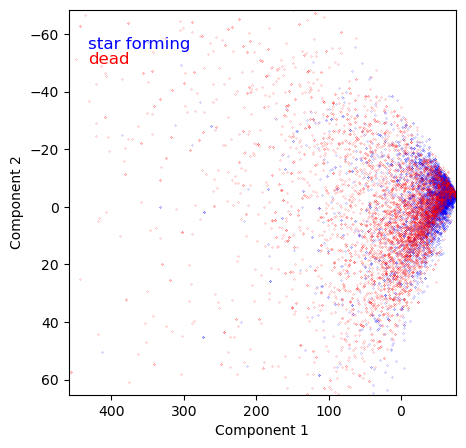

In [10]:
fig, ax = plt.subplots(1, figsize=(5, 5), dpi=100)
ax.set_xlim(np.percentile(y_pcs[:,0], 99), np.percentile(y_pcs[:,0], 1))
ax.set_ylim(np.percentile(y_pcs[:,1], 99), np.percentile(y_pcs[:,1], 1))
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
is_sf = np.isin(df_cut.loc[:, 'is_star_forming'], 1)

ax.scatter(y_pcs[is_sf, 0], y_pcs[is_sf, 1], s=0.02, c='b')
ax.scatter(y_pcs[~is_sf, 0], y_pcs[~is_sf, 1], s=0.02, c='r')
ax.annotate("star forming", xy=(0.05, 0.9), xycoords="axes fraction", 
            color='b', fontsize=12)
ax.annotate("dead", xy=(0.05, 0.86), xycoords="axes fraction", 
            color='r', fontsize=12)
plt.show()

Clearly, in the above dimensions we cannot draw a **decision boundary** to separate the living galaxies from the dead. Therefore, the classification is not physically meaningful to us. But out of curiosity, let us check the other physical properties, such as galaxy mass `log_mass` and rate of star formation `log_sfr`, as well:


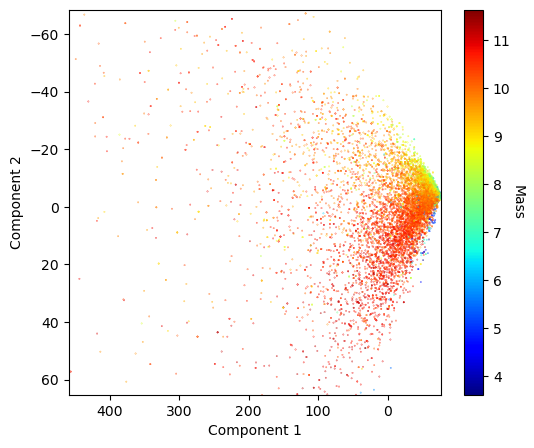

In [11]:
fig, ax = plt.subplots(1, figsize=(6, 5), dpi=100)
ax.set_xlim(np.percentile(y_pcs[:,0], 99), np.percentile(y_pcs[:,0], 1))
ax.set_ylim(np.percentile(y_pcs[:,1], 99), np.percentile(y_pcs[:,1], 1))
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')

sc = ax.scatter(y_pcs[:,0], y_pcs[:,1], s=0.05, 
                c=df_cut.loc[:, 'log_mass'], cmap='jet')
cbar = plt.colorbar(sc)
cbar.ax.set_ylabel('Mass', rotation=270, labelpad=10)
plt.show()

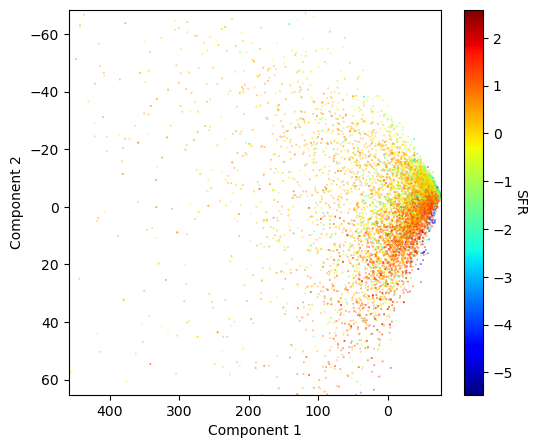

In [12]:
fig, ax = plt.subplots(1, figsize=(6, 5), dpi=100)
ax.set_xlim(np.percentile(y_pcs[:,0], 99), np.percentile(y_pcs[:,0], 1))
ax.set_ylim(np.percentile(y_pcs[:,1], 99), np.percentile(y_pcs[:,1], 1))
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')

sc = ax.scatter(y_pcs[:,0], y_pcs[:,1], s=0.05, 
                c=df_cut.loc[:, 'log_sfr'], cmap='jet')
cbar = plt.colorbar(sc)
cbar.ax.set_ylabel('SFR', rotation=270, labelpad=10)
plt.show()

Again, all objects are mixed together in not a helpful way... What about the last property, the `redshift`s? This feature is supposed to introduce a bias in the fluxes.

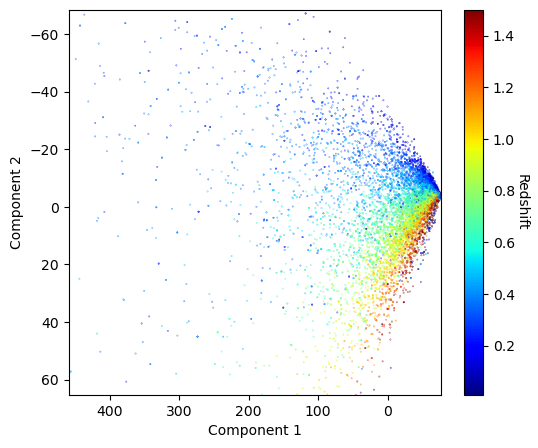

In [13]:
fig, ax = plt.subplots(1, figsize=(6, 5), dpi=100)
ax.set_xlim(np.percentile(y_pcs[:,0], 99), np.percentile(y_pcs[:,0], 1))
ax.set_ylim(np.percentile(y_pcs[:,1], 99), np.percentile(y_pcs[:,1], 1))
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')

sc = ax.scatter(y_pcs[:,0], y_pcs[:,1], s=0.05, vmax=1.5,
                c=df_cut.loc[:, 'redshift'], cmap='jet')
cbar = plt.colorbar(sc)
cbar.ax.set_ylabel('Redshift', rotation=270, labelpad=10)
plt.show()

You can see that separation in `redshift` is better indeed. Therefore, the conclusion here is not that `PCA` is a particularly bad choice, but rather that it picks up the strongest signal affecting the data, which in this case turns out to be a systematic effect of the redshift. Therefore, if we would like to reduce dimensions meaningfully in other properties of interest, we need to correct for the effect of redshift first. You will attempt to do this in the next session, when you will pay more attention to preprocessing and selection of hyperparameters.


## Kernel PCA

For now, let us continue throwing these data at other algorithms to get some practice with them. `KernelPCA` is a variant of the PCA, which can use a range of kernels for non-linear operations. I.e., this extension gives flexibility in separating the data that are not linearly-separable.

Make sure to try different kernels for reducing the dimensionality. See documentation for `KernelPCA` in **sklearn**.

For Kernel PCA see the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html#sklearn.decomposition.KernelPCA).

In [14]:
kpca = KernelPCA(n_components=2, kernel='cosine')
y_pcs = kpca.fit_transform(X[:, flux_idxs])

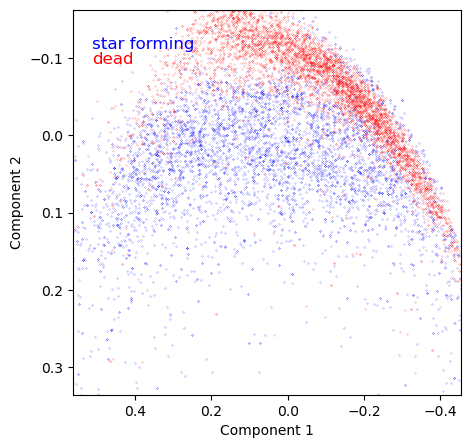

In [15]:
fig, ax = plt.subplots(1, figsize=(5, 5), dpi=100)
ax.set_xlim(np.percentile(y_pcs[:,0], 99), np.percentile(y_pcs[:,0], 1))
ax.set_ylim(np.percentile(y_pcs[:,1], 99), np.percentile(y_pcs[:,1], 1))
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
is_sf = np.isin(df_cut.loc[:, 'is_star_forming'], 1)

ax.scatter(y_pcs[is_sf, 0], y_pcs[is_sf, 1], s=0.02, c='b')
ax.scatter(y_pcs[~is_sf, 0], y_pcs[~is_sf, 1], s=0.02, c='r')
ax.annotate("star forming", xy=(0.05, 0.9), xycoords="axes fraction", 
            color='b', fontsize=12)
ax.annotate("dead", xy=(0.05, 0.86), xycoords="axes fraction", 
            color='r', fontsize=12)
plt.show()

Ok, the projections above are better than with the linear `PCA`, but still quite mixed. Below, you can see that the redshifts an apparent signal picked up by the non-linear PCA.

You can try to adjust the contrast by using the matplotlib parameters `vmin` and `vmax`.

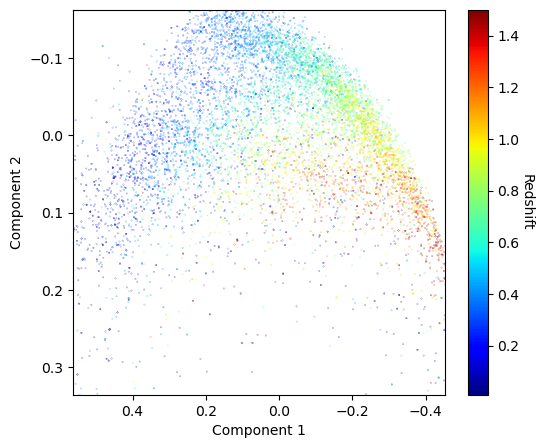

In [16]:
fig, ax = plt.subplots(1, figsize=(6, 5), dpi=100)
ax.set_xlim(np.percentile(y_pcs[:,0], 99), np.percentile(y_pcs[:,0], 1))
ax.set_ylim(np.percentile(y_pcs[:,1], 99), np.percentile(y_pcs[:,1], 1))
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')

sc = ax.scatter(y_pcs[:,0], y_pcs[:,1], s=0.02, vmax=1.5,
                c=df_cut.loc[:, 'redshift'], cmap='jet')
cbar = plt.colorbar(sc)
cbar.ax.set_ylabel('Redshift', rotation=270, labelpad=10)
plt.show()

Now, try to run `t-SNE` on the dataset (for examples or set-up see documentation for `t-SNE` on sklearn [website](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)). Use `perplexity=50, method='barnes_hut', n_iter=1000, random_state=42` for now. In the next class we will put more emphasis on the importance of the optimal values for theses parameters. Complexity of `t-SNE` (with approximate solver `barnes_hut`) is $\mathcal{O}(k n^2)$, where $k$ - number of output dimensions, $n$ - number of samples.



In [17]:
# running t-SNE
tsne = TSNE(perplexity=20, n_iter=1000, init='random', verbose=2, 
            method='barnes_hut', learning_rate='auto', random_state=42)
y = tsne.fit_transform(X[:, flux_idxs])

/opt/miniconda3/envs/appml/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.004s...
[t-SNE] Computed neighbors for 10000 samples in 0.102s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.999014
[t-SNE] Computed conditional probabilities in 0.063s
[t-SNE] Iteration 50: error = 100.9090881, gradient norm = 0.0509474 (50 iterations in 1.256s)
[t-SNE] I

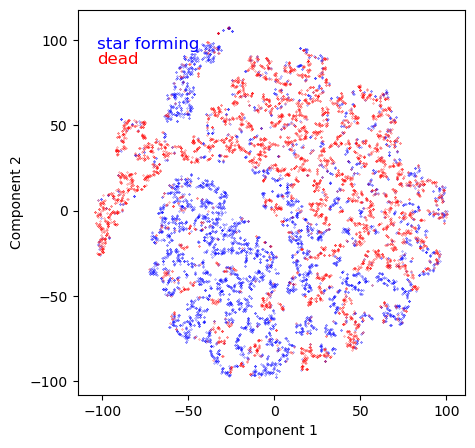

In [18]:
fig, ax = plt.subplots(1, figsize=(5, 5), dpi=100)
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
is_sf = np.isin(df_cut.loc[:, 'is_star_forming'], 1)

ax.scatter(y[is_sf, 0], y[is_sf, 1], s=0.05, c='b')
ax.scatter(y[~is_sf, 0], y[~is_sf, 1], s=0.05, c='r')
ax.annotate("star forming", xy=(0.05, 0.9), xycoords="axes fraction", 
            color='b', fontsize=12)
ax.annotate("dead", xy=(0.05, 0.86), xycoords="axes fraction", 
            color='r', fontsize=12)
plt.show()

Now, the map produced with `t-SNE` is much more meaningful to us. It is not ideal and there are plenty of stray objects in either red or blue group, but we can even compute a decision boundary for these projections to do probably quite accurate classification.

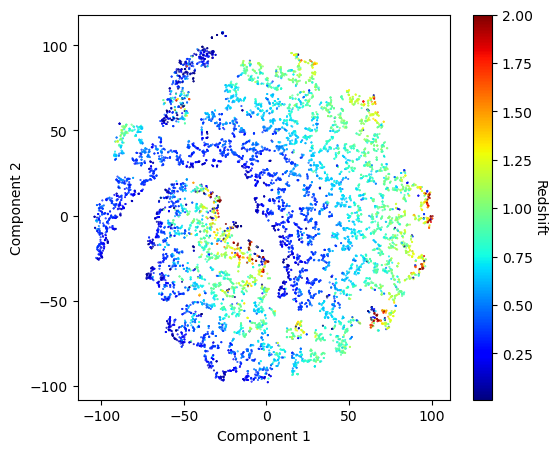

In [19]:
fig, ax = plt.subplots(1, figsize=(6, 5), dpi=100)
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')

sc = ax.scatter(y[:,0], y[:,1], s=0.2, vmax=2.0,
                c=df_cut.loc[:, 'redshift'], cmap='jet')
cbar = plt.colorbar(sc)
cbar.ax.set_ylabel('Redshift', rotation=270, labelpad=10)
plt.show()

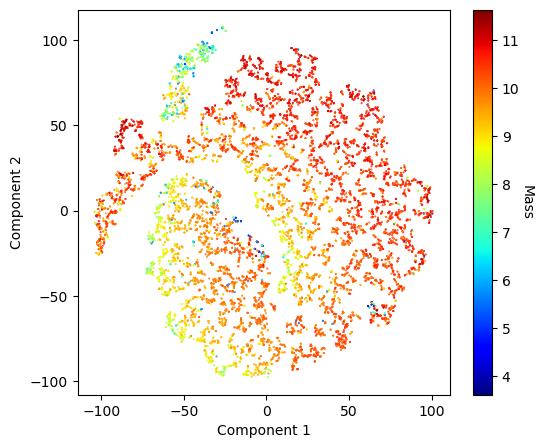

In [20]:
fig, ax = plt.subplots(1, figsize=(6, 5), dpi=100)
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')

sc = ax.scatter(y[:,0], y[:,1], s=0.2,
                c=df_cut.loc[:, 'log_mass'], cmap='jet')
cbar = plt.colorbar(sc)
cbar.ax.set_ylabel('Mass', rotation=270, labelpad=10)
plt.show()

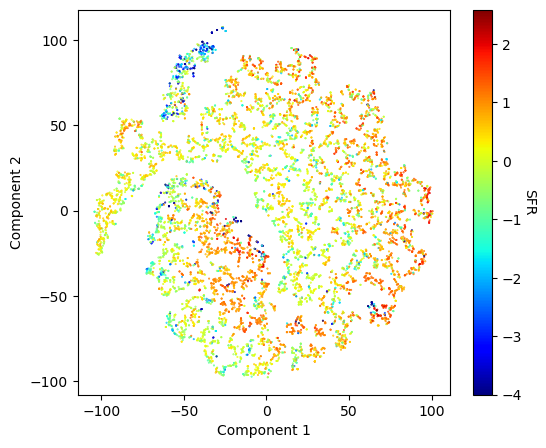

In [21]:
fig, ax = plt.subplots(1, figsize=(6, 5), dpi=100)
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')

sc = ax.scatter(y[:,0], y[:,1], s=0.2, vmin=-4,
                c=df_cut.loc[:, 'log_sfr'], cmap='jet')
cbar = plt.colorbar(sc)
cbar.ax.set_ylabel('SFR', rotation=270, labelpad=10)
plt.show()

### UMAP

Now try using `UMAP`. For documentation see the UMAP [webpage](https://umap-learn.readthedocs.io/en/latest/api.html). This has the same interface as the other embedding classes above. Use with `n_components=2, n_neighbors=50, random_state=42`. 


In [22]:
map = umap.UMAP(n_components=2, n_neighbors=50, random_state=42)
y = map.fit_transform(X[:, flux_idxs])

/opt/miniconda3/envs/appml/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/miniconda3/envs/appml/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


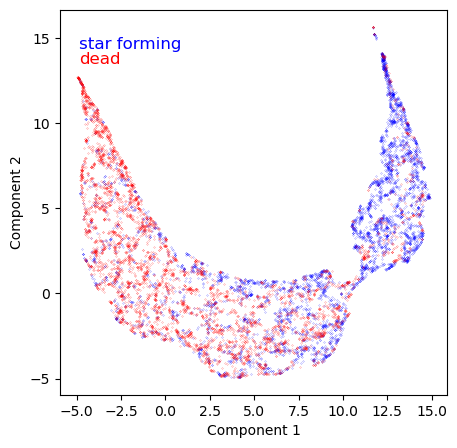

In [23]:
fig, ax = plt.subplots(1, figsize=(5, 5), dpi=100)
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
is_sf = np.isin(df_cut.loc[:, 'is_star_forming'], 1)

ax.scatter(y[is_sf, 0], y[is_sf, 1], s=0.02, c='b')
ax.scatter(y[~is_sf, 0], y[~is_sf, 1], s=0.02, c='r')
ax.annotate("star forming", xy=(0.05, 0.9), xycoords="axes fraction", 
            color='b', fontsize=12)
ax.annotate("dead", xy=(0.05, 0.86), xycoords="axes fraction", 
            color='r', fontsize=12)
plt.show()

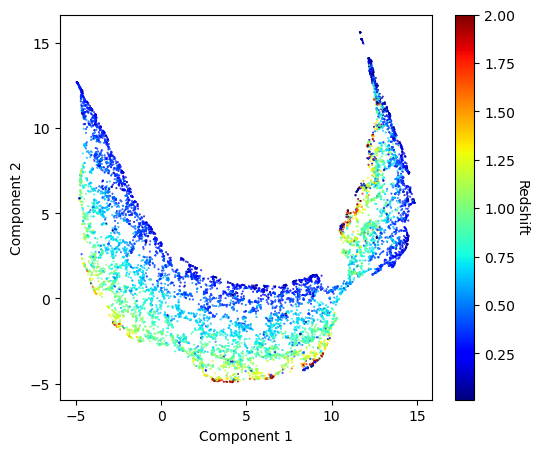

In [24]:
fig, ax = plt.subplots(1, figsize=(6, 5), dpi=100)
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')

sc = ax.scatter(y[:,0], y[:,1], s=0.2, vmax=2.0,
                c=df_cut.loc[:, 'redshift'], cmap='jet')
cbar = plt.colorbar(sc)
cbar.ax.set_ylabel('Redshift', rotation=270, labelpad=10)
plt.show()

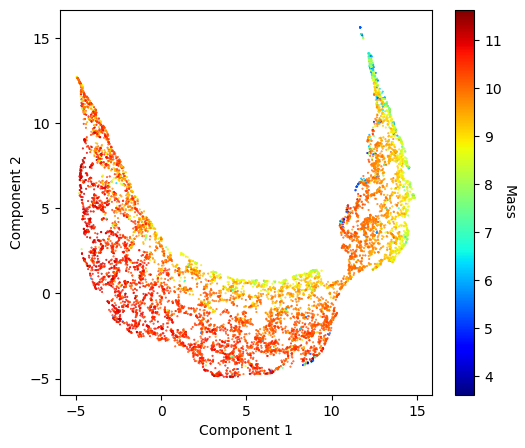

In [25]:
fig, ax = plt.subplots(1, figsize=(6, 5), dpi=100)
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')

sc = ax.scatter(y[:,0], y[:,1], s=0.2,
                c=df_cut.loc[:, 'log_mass'], cmap='jet')
cbar = plt.colorbar(sc)
cbar.ax.set_ylabel('Mass', rotation=270, labelpad=10)
plt.show()

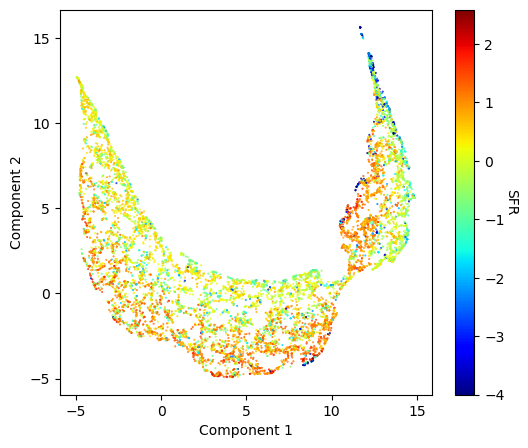

In [26]:
fig, ax = plt.subplots(1, figsize=(6, 5), dpi=100)
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')

sc = ax.scatter(y[:,0], y[:,1], s=0.2, vmin=-4,
                c=df_cut.loc[:, 'log_sfr'], cmap='jet')
cbar = plt.colorbar(sc)
cbar.ax.set_ylabel('SFR', rotation=270, labelpad=10)
plt.show()

If you are interested in seeing how different dimension reduction algorithms' complexities compare, see the plots here:

https://umap-learn.readthedocs.io/en/latest/benchmarking.html